# importing necessery library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('customer_churn_analysis')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# checking for null values

<AxesSubplot:>

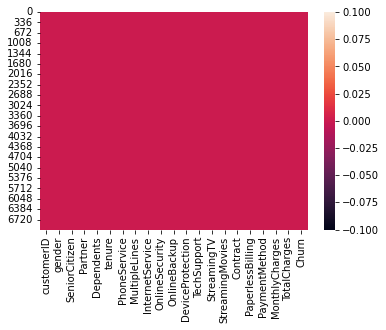

In [4]:
sns.heatmap(data.isnull())

data set has no missing data present

In [5]:
data.drop('customerID',axis=1,inplace=True)
data.drop('SeniorCitizen',axis=1,inplace=True)
data.drop('PaperlessBilling',axis=1,inplace=True)
data.drop('TechSupport',axis=1,inplace=True)
data.drop('StreamingMovies',axis=1,inplace=True)

In [6]:
data.head(4)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.5,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,One year,Bank transfer (automatic),42.30,1840.75,No


In [7]:
data.dtypes

gender               object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
StreamingTV          object
Contract             object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
others = data.select_dtypes('object').columns
others

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'StreamingTV', 'Contract', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
le = LabelEncoder()
for col in others:
    data[col] = le.fit_transform(data[col])

# describing the dataset

In [11]:
data.describe()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.985376,0.690473,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.885002,0.833755,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,118.750000,6530.000000,1.000000


# checking for correlation

In [12]:
data.corr()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006421,0.000126,0.017352,-0.014569,-0.005291,-0.008612
Partner,-0.001808,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.137341,0.294806,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.046885,0.243187,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.289373,0.671607,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,0.055353,0.002247,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.175059,0.110842,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,0.107417,0.099721,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.044669,0.374416,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.147186,0.280980,-0.124847,0.119777,0.090756,-0.195525
DeviceProtection,0.000549,0.166330,0.080537,0.371105,0.003727,0.122318,0.044944,0.175985,0.187757,1.000000,0.276652,0.350277,-0.135750,0.163652,0.105905,-0.178134


<AxesSubplot:>

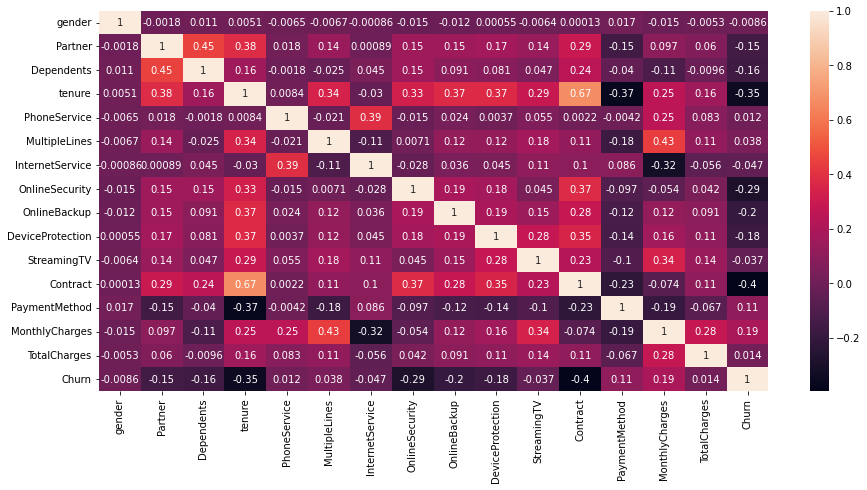

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

gender                 AxesSubplot(0.125,0.657941;0.065678x0.222059)
Partner             AxesSubplot(0.203814,0.657941;0.065678x0.222059)
Dependents          AxesSubplot(0.282627,0.657941;0.065678x0.222059)
tenure              AxesSubplot(0.361441,0.657941;0.065678x0.222059)
PhoneService        AxesSubplot(0.440254,0.657941;0.065678x0.222059)
MultipleLines       AxesSubplot(0.519068,0.657941;0.065678x0.222059)
InternetService     AxesSubplot(0.597881,0.657941;0.065678x0.222059)
OnlineSecurity      AxesSubplot(0.676695,0.657941;0.065678x0.222059)
OnlineBackup        AxesSubplot(0.755508,0.657941;0.065678x0.222059)
DeviceProtection    AxesSubplot(0.834322,0.657941;0.065678x0.222059)
StreamingTV            AxesSubplot(0.125,0.391471;0.065678x0.222059)
Contract            AxesSubplot(0.203814,0.391471;0.065678x0.222059)
PaymentMethod       AxesSubplot(0.282627,0.391471;0.065678x0.222059)
MonthlyCharges      AxesSubplot(0.361441,0.391471;0.065678x0.222059)
TotalCharges        AxesSubplot(0.

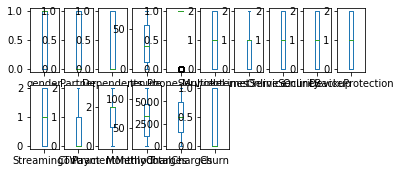

In [14]:
data.plot(subplots=True,kind='box',layout=(3,10))

# checking for skewness

In [15]:
data.skew()

gender             -0.019031
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
StreamingTV         0.028486
Contract            0.630959
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

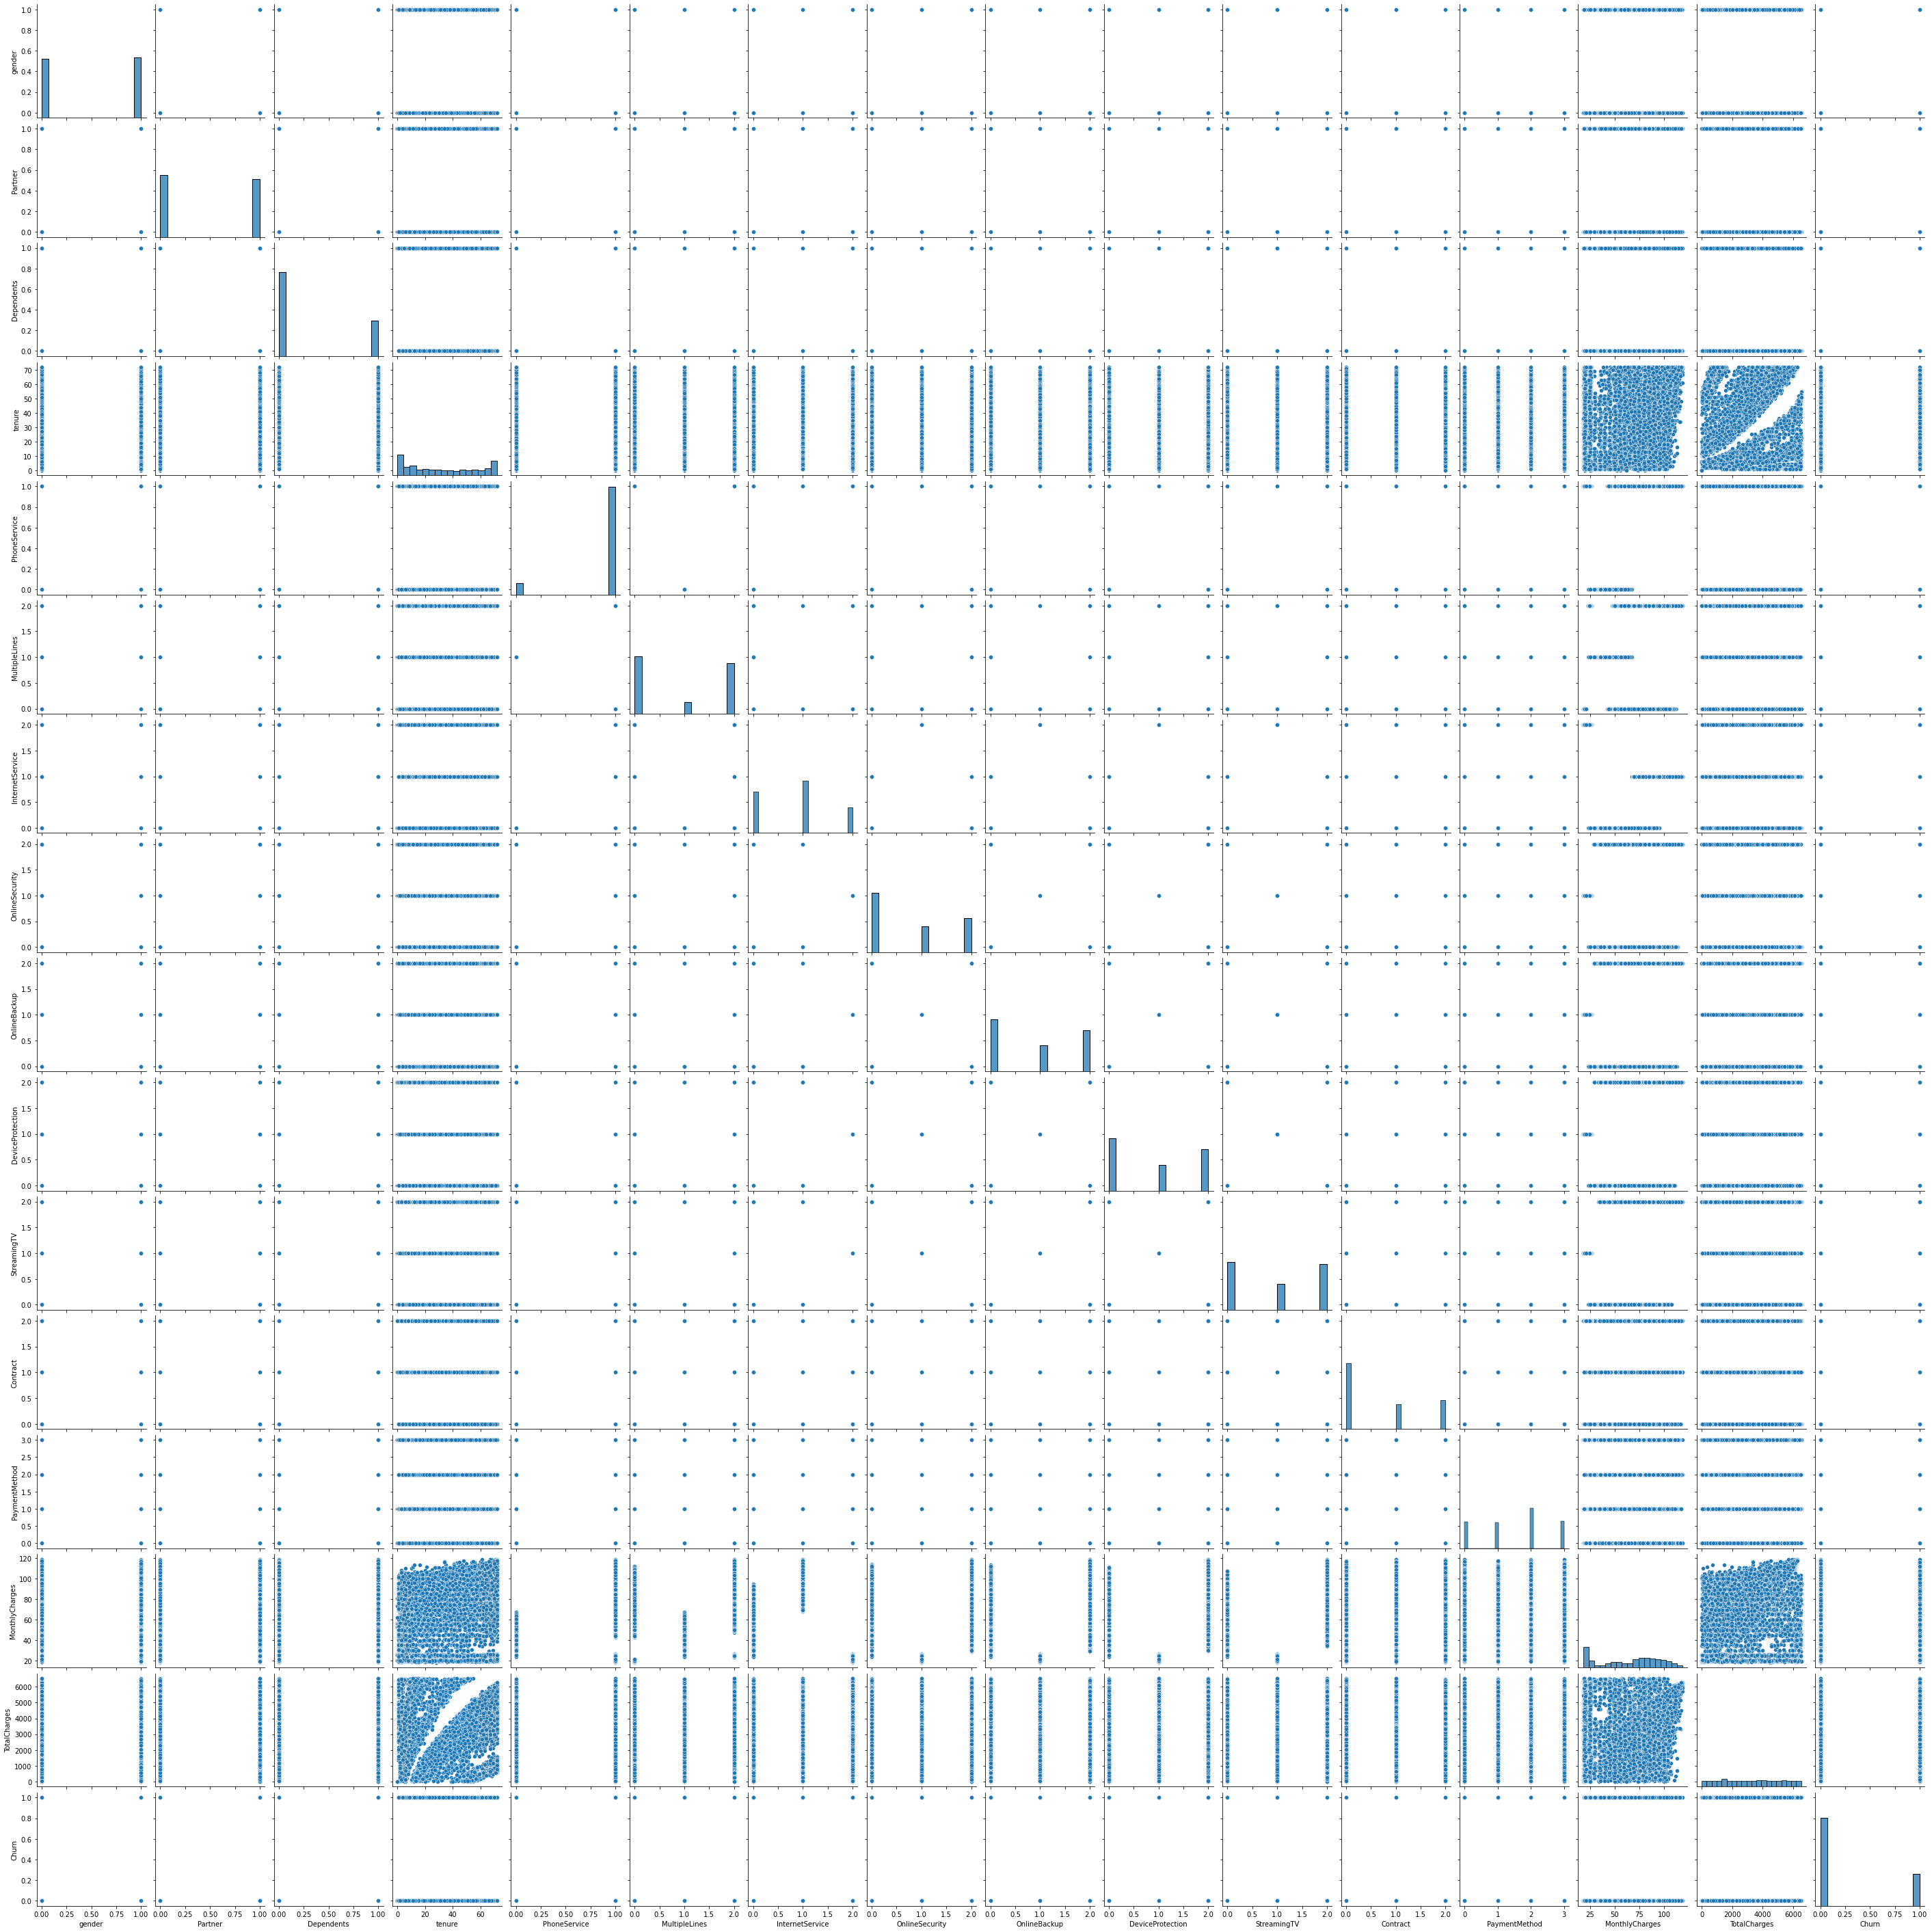

In [16]:
sns.pairplot(data)

In [17]:
x=data.drop(['Churn'],axis=1)
x

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,1,0,0,2,0,0,0,2,29.85,2505
1,1,0,0,34,1,0,0,2,0,2,0,1,3,56.95,1466
2,1,0,0,2,1,0,0,2,2,0,0,0,3,53.85,157
3,1,0,0,45,0,1,0,2,0,2,0,1,0,42.30,1400
4,0,0,0,2,1,0,1,0,0,0,0,0,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,1,2,0,2,0,2,2,1,3,84.80,1597
7039,0,1,1,72,1,2,1,0,2,2,2,1,1,103.20,5698
7040,0,1,1,11,0,1,0,2,0,0,0,0,2,29.60,2994
7041,1,1,0,4,1,2,1,0,0,0,0,0,3,74.40,2660


In [18]:
y=data['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# transforming dataset to remove skewness

In [19]:
from sklearn.preprocessing import power_transform

In [20]:
x=power_transform(x,method='yeo-johnson')
x

array([[-1.00955867,  1.03453023, -0.65401193, ...,  0.40968472,
        -1.1585412 , -0.28254766],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.23949171, -0.88438245],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.34266505, -1.93709705],
       ...,
       [-1.00955867,  1.03453023,  1.5290241 , ...,  0.40968472,
        -1.16724064, -0.02722738],
       [ 0.99053183,  1.03453023, -0.65401193, ...,  1.31889872,
         0.33431207, -0.20008892],
       [ 0.99053183, -0.96662231, -0.65401193, ..., -1.48983732,
         1.33886338,  1.08504111]])

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [22]:
sc.fit_transform(x)
x

array([[-1.00955867,  1.03453023, -0.65401193, ...,  0.40968472,
        -1.1585412 , -0.28254766],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.23949171, -0.88438245],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.34266505, -1.93709705],
       ...,
       [-1.00955867,  1.03453023,  1.5290241 , ...,  0.40968472,
        -1.16724064, -0.02722738],
       [ 0.99053183,  1.03453023, -0.65401193, ...,  1.31889872,
         0.33431207, -0.20008892],
       [ 0.99053183, -0.96662231, -0.65401193, ..., -1.48983732,
         1.33886338,  1.08504111]])

<AxesSubplot:xlabel='Churn', ylabel='count'>

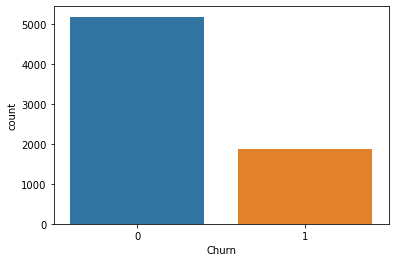

In [23]:
sns.countplot(data['Churn'])

dataset is imbalanced

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)
print(x.shape,y.shape)

(10348, 15) (10348,)


In [26]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

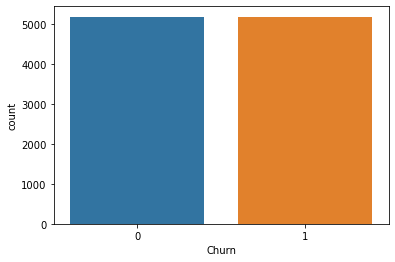

In [27]:
sns.countplot(y)

now dataset is balanced

# spliting the dataset

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [30]:
print(y.shape, y_train.shape, y_test.shape)

(10348,) (7243,) (3105,)


# model building

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
lr=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [33]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7752012882447665
[[1136  439]
 [ 259 1271]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1575
           1       0.74      0.83      0.78      1530

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.77      3105
weighted avg       0.78      0.78      0.77      3105



In [34]:
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7935587761674718
[[1233  342]
 [ 299 1231]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1575
           1       0.78      0.80      0.79      1530

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [35]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8051529790660226
[[1162  413]
 [ 192 1338]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1575
           1       0.76      0.87      0.82      1530

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.80      3105
weighted avg       0.81      0.81      0.80      3105



In [36]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7671497584541063
[[1051  524]
 [ 199 1331]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.74      1575
           1       0.72      0.87      0.79      1530

    accuracy                           0.77      3105
   macro avg       0.78      0.77      0.77      3105
weighted avg       0.78      0.77      0.76      3105



In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [38]:
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ab=AdaBoostClassifier()

In [39]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8444444444444444
[[1293  282]
 [ 201 1329]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1575
           1       0.82      0.87      0.85      1530

    accuracy                           0.84      3105
   macro avg       0.85      0.84      0.84      3105
weighted avg       0.85      0.84      0.84      3105



In [40]:
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8273752012882448
[[1224  351]
 [ 185 1345]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1575
           1       0.79      0.88      0.83      1530

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [41]:
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8103059581320451
[[1180  395]
 [ 194 1336]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1575
           1       0.77      0.87      0.82      1530

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



# cross validation


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
for i in range(2,9):
    cv=cross_val_score(gb,x,y,cv=i)
    print(gb,cv.mean())

GradientBoostingClassifier() 0.8065326633165829
GradientBoostingClassifier() 0.8198758724435984
GradientBoostingClassifier() 0.8268264398917665
GradientBoostingClassifier() 0.8259650744951352
GradientBoostingClassifier() 0.8276075187464272
GradientBoostingClassifier() 0.8285791662565823
GradientBoostingClassifier() 0.8292570953332113


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
param_alpha={'alpha':[.0001,.001,.01,.1,]}

In [45]:
rd=Ridge()

In [46]:
gd=GridSearchCV(estimator=rd,param_grid=param_alpha)

In [47]:
gd.fit(x,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [48]:
gd.best_params_

{'alpha': 0.1}

In [49]:
gd.best_score_

0.08076573170305945

In [50]:
pred=rf.predict(x_test)
print('Churn',pred)
print('Churn',y_test)

Churn [0 1 1 ... 0 0 0]
Churn 4381    1
8995    1
7774    1
1650    1
7868    1
       ..
4922    0
2964    0
6147    0
4236    0
2063    0
Name: Churn, Length: 3105, dtype: int32


In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared erroe:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 0.15555555555555556
Mean squared erroe: 0.15555555555555556
Root Mean Squared Error: 0.39440531887330776
